In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
num_new_points = 15
X = np.random.uniform(0, 6, num_new_points).reshape(-1, 1)  # Generate random X values between 0 and 6
Z = np.random.uniform(0, 6, num_new_points).reshape(-1, 1)  # Generate random Z values between 0 and 6
noise = np.random.normal(0, 1, num_new_points)  # Generate random noise
Y = 2 * X.flatten() + 3 * Z.flatten() + noise

df = pd.DataFrame({'X': X.flatten(), 'Z': Z.flatten(), 'Y': Y})

In [4]:
df

,X,Z,Y
0,5.442499,5.794283,29.685784
1,0.468590,0.423002,3.365729
2,1.352092,1.036673,6.852344
3,5.824615,2.536311,18.357921
4,1.973446,5.022485,18.902389
5,2.237543,1.921100,11.752856
6,5.774384,1.201787,15.968960
7,0.420124,5.474388,17.768589
8,1.765163,4.076577,14.195061
9,2.359670,3.492678,14.673190


In [5]:
df['division'] = df['X'] / df['Y']
df = df[df['division'] > 0.1]
df

,X,Z,Y,division
0,5.442499,5.794283,29.685784,0.183337
1,0.468590,0.423002,3.365729,0.139224
2,1.352092,1.036673,6.852344,0.197318
3,5.824615,2.536311,18.357921,0.317281
4,1.973446,5.022485,18.902389,0.104402
5,2.237543,1.921100,11.752856,0.190383
6,5.774384,1.201787,15.968960,0.361601
8,1.765163,4.076577,14.195061,0.124350
9,2.359670,3.492678,14.673190,0.160815
11,5.803808,3.794329,21.216470,0.273552


In [6]:
np.mean(df['division'])

0.2103125167803212

In [7]:
min(df['division'])

0.10440192560448883

In [8]:
df['division'].min()

0.10440192560448883

In [9]:
df['division'].std()

0.08059791894527331

In [10]:
df['division'].var()

0.006496024538308846

In [11]:
correlation, _ = pearsonr(df['X'], df['Y'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.7555511287802886


In [12]:
# Regression Analysis
X = sm.add_constant(df['X'])  # adding a constant
model = sm.OLS(df['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     14.63
Date:                Wed, 06 Dec 2023   Prob (F-statistic):            0.00282
Time:                        09:49:38   Log-Likelihood:                -38.596
No. Observations:                  13   AIC:                             81.19
Df Residuals:                      11   BIC:                             82.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9856      2.850      2.101      0.0

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Examine assumptions

Linearity:

In [13]:
len(df['Y'])

13

In [14]:
len(X)

13

Linearity Assumption:

If the data points roughly align along a straight line, this suggests a linear relationship between the predictor(s) and the outcome variable. 

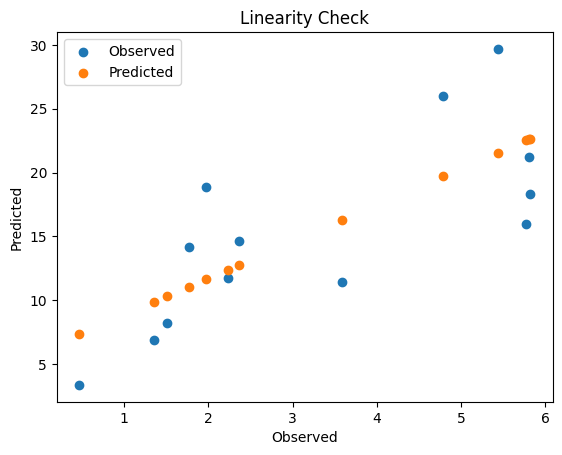

In [15]:
predictions = model.predict(X)
plt.scatter(df['X'], df['Y'], label='Observed')
plt.scatter(df['X'], predictions, label='Predicted')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Linearity Check")
plt.legend()
plt.show()

Independence of Errors:

If the errors are independent, would expect to see no systematic patterns or trends in the residuals; they should appear random around zero.

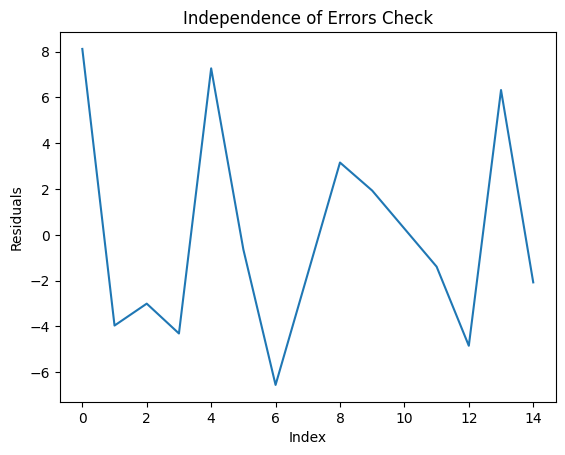

In [16]:
residuals = model.resid
plt.plot(residuals)
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Independence of Errors Check")
plt.show()

If DW statistic is close to 2, it suggests no significant autocorrelation.  
Autocorrelation occurs when the residuals are correlated with each other, meaning that the error terms at different points in the dataset are not independent.  
Autocorrelation violates the assumption of independence of errors.  

In [17]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(model.resid)
print(f"Durbin-Watson Statistic: {dw_statistic}")

Durbin-Watson Statistic: 2.40364299799707


Homoscedasticity:

The variance of the errors should be constant across all levels of the independent variables. In other words, the spread of residuals should be roughly the same for all predicted values.

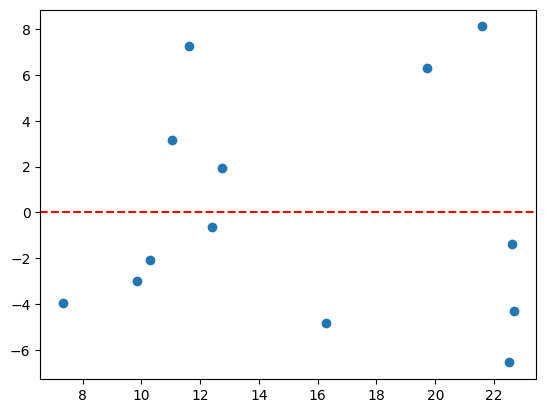

In [18]:
# residuals = df['y'] - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Normality of Residuals:

How well the points (blue dots) fit the red line.

Most of the points in the middle section of the plot follow the red line closely, suggesting that the central part of the data is normally distributed. The divergence of the points at the ends (the tails) indicates that the distribution of the data has heavier tails than the normal distribution. This means there are more extreme values (outliers) than would be expected in a normal distribution.

However, the presence of outliers or heavy tails could influence statistical tests that assume normality.

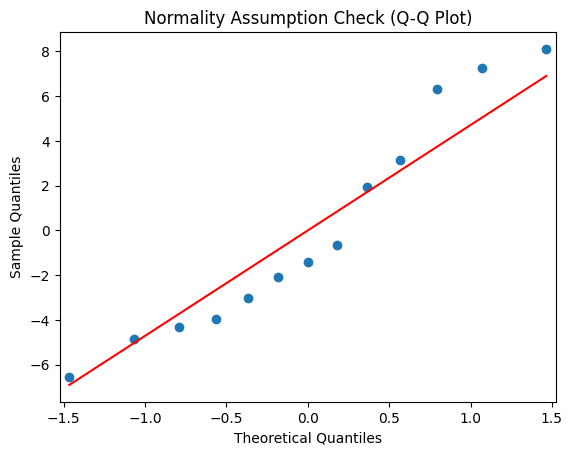

In [19]:
sm.qqplot(residuals, line='s')
plt.title('Normality Assumption Check (Q-Q Plot)')
plt.show()

In [20]:
# can also perform a formal statistical test like the Shapiro-Wilk test for normality.
from scipy.stats import shapiro

shapiro_test_statistic, shapiro_p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"Shapiro-Wilk Test p-value: {shapiro_p_value}")

Shapiro-Wilk Test Statistic: 0.9188268184661865
Shapiro-Wilk Test p-value: 0.24186263978481293


In [21]:
# Split the data into training and testing sets
X = df[['X', 'Z']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# The coefficients
print('Coefficient (Slope): \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Example of predicting a new value
print('Predicted value for 6: \n', model.predict([[4.303745, 4.716749]]))

# Make predictions
y_pred = model.predict(X_test)

Coefficient (Slope): 
 [1.87529723 2.54309571]
Intercept: 
 1.5278179130865226
Predicted value for 6: 
 [21.59376315]


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
r_squared = r2_score(y_test, y_pred) # Coefficient of Determination, R-squared value
r_squared

0.5763453855187424

In [23]:
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)
mae

2.0391439266408646

In [24]:
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error (RMSE)
mse

5.09574578101713

Advantages of MSE:

Sensitivity to Errors: MSE gives more weight to large errors because it squares the differences between predicted and actual values. This means that it is particularly sensitive to outliers and can penalize them more heavily. In some cases, this is desirable as it can help the model focus on reducing large errors.

Disadvantages of MSE:

Units of Measurement: The units of MSE are the square of the units of the dependent variable, which can make it less interpretable. For example, if you're predicting house prices in dollars, MSE will be in square dollars, which doesn't have a direct interpretation.

Sensitivity to Outliers: While the sensitivity to outliers can be an advantage in some cases, it can also be a disadvantage. Outliers can have a disproportionate impact on MSE, and if your dataset contains many outliers, it might not provide a representative measure of overall model performance.


Advantages of MAE:

Robustness to Outliers: MAE is less sensitive to outliers compared to MSE because it doesn't square the errors. This makes it a more robust metric when your dataset contains significant outliers.

Interpretability: MAE has a more straightforward interpretation because it gives the average absolute error in the same units as the dependent variable. This makes it easier to explain to non-technical stakeholders.

Disadvantages of MAE:

Less Emphasis on Large Errors: MAE treats all errors, whether large or small, with equal weight. In cases where you want to focus more on reducing large errors, this may not be the most appropriate metric.

Less Information on Outliers: While MAE is less sensitive to outliers, it provides less information about the distribution of errors compared to MSE. This might be a disadvantage if you need to understand the nature of errors in your model.

In [25]:
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
rmse

2.2573758617069357

In [26]:
residuals = y_test - y_pred
residuals

13    2.056628
11   -0.844557
0     3.216246
Name: Y, dtype: float64

In [27]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -scores.mean()  # Average (Meab Squared Error) MSE across cross-validation folds, evaluate its generalization ability and assess its stability.
mse_cv

2.0120451896613916